In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [7]:
DATAPATH = Path("C://Data//hislight_pickles//HL3_restricted_dark.pickle")

with open(DATAPATH, 'rb') as handle:
    HL3_light = pickle.load(handle)

In [27]:
mouse_to_be_analyzed = "HL317"

In [28]:
run_length = []
run_licks  = []

snips_start = []
snips_end = []
snips_full = []
    
kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

pre = 5
post = 10
mineventlength=10
binlength=0.1
    
for key, val in HL3_light.items():
    if val["mouse_ID"] == mouse_to_be_analyzed:
        if len(val["licks"]) < 50:
            continue
        lickdata= tp.lickCalc(val["licks"], minrunlength=3)
        
        run_length.append(lickdata["rTime"])
        run_licks.append(lickdata["rLicks"])
       
        snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
        snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])
        
        snipper = tp.Snipper(val["corrected"],
                             lickdata["rStart"],
                             end=lickdata["rEnd"],
                             fs=val["fs"],
                             pre=pre,
                             post=post,
                             binlength=binlength,
                             zscore=True
                             )
        
        # plt.plot(snipper.snips)
        snipper.truncate_to_same_length(cols_to_add=10, mineventlength=mineventlength)
        snips_full.append(snipper.snips)
        #print(len(snipper.snips))
        #print(len(snipper.snips[0]))
        #print(len(snipper.snips[1]))
        

run_length = tp.flatten_list(run_length)
run_licks = tp.flatten_list(run_licks)

snips_start = np.vstack(snips_start)
snips_end = np.vstack(snips_end)
snips_full = np.vstack(snips_full)

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:158: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)


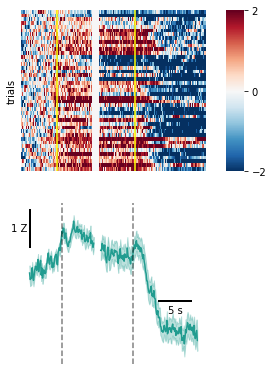

In [29]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,6.5],
                                        gridspec_kw={"width_ratios":[10,1]})



sns.heatmap(snips_full, ax=ax1, cbar_ax= ax2, cmap="RdBu_r", vmax=2, vmin=-2, cbar_kws={"ticks": [2, 0, -2]})

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

x1 = np.arange(0,bins_early)
x2 = np.arange(snips_full.shape[1] - bins_late, snips_full.shape[1])

mean = np.mean(snips_full, axis=0)
error_values = np.std(snips_full, axis=0) / np.sqrt(len(snips_full))

color="#219C90"

ax3.plot(x1, mean[:bins_early], color=color)
ax3.plot(x2, mean[-bins_late:], color=color)
ax3.fill_between(x1, mean[:bins_early]-error_values[:bins_early], mean[:bins_early]+error_values[:bins_early], color=color, alpha=0.3)
ax3.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], mean[-bins_late:]+error_values[-bins_late:], color=color, alpha=0.3)


# tp.shadedError(ax3, snips_full)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="yellow")
ax1.axvline(160, color="yellow")

ax3.set_yticks([])
ax3.set_xticks([])

ax1.set_ylabel("trials")

for spine in ["top", "right", "left", "bottom"]:
    ax3.spines[spine].set_visible(False)

ax3.plot([200,250], [-1,-1], linewidth=2, color="k")
ax3.text(225,-1.1,"5 s", va="top", ha="center")

ax3.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax3.text(-3, 1, "1 Z", va="center", ha="right")

ax3.axvline(50, color="k", linestyle="--", alpha=0.5)
ax3.axvline(160, color="k", linestyle="--", alpha=0.5)

#f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\HL3_representative.pdf")

In [93]:
AUC_start = np.trapz(snips_start[:,50:])
AUC_end = np.trapz(snips_end[:,50:])

Text(0.5, 1.0, 'run end')

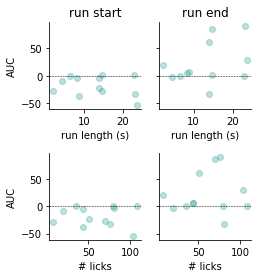

In [94]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,4],
                                        gridspec_kw={"width_ratios":[1,1], "left":0.2, "hspace":0.5},
                                       sharey=True)


ax1.scatter(run_length, AUC_start, alpha=0.3, color= "#219C90")
ax3.scatter(run_licks, AUC_start, alpha=0.3, color= "#219C90")

ax2.scatter(run_length, AUC_end, alpha=0.3, color= "#219C90")
ax4.scatter(run_licks, AUC_end, alpha=0.3, color= "#219C90")

ax1.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax2.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax3.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax4.axhline(0, color="black", linestyle="--", linewidth=0.5)

ax1.set_xlabel("run length (s)")
ax3.set_xlabel("# licks")
ax2.set_xlabel("run length (s)")
ax4.set_xlabel("# licks")

ax1.set_ylabel("AUC")
ax3.set_ylabel("AUC")
#ax2.set_ylabel("AUC")
#ax4.set_ylabel("AUC")

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.set_title("run start")
ax2.set_title("run end")



#f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\HL3_rep_runs_vs_AUC.pdf")

In [24]:
from sklearn.metrics import r2_score

def best_fit(x, slope, intercept):
    return slope*np.array(x)+intercept

slope, intercept = np.polyfit(run_length, AUC_end,1)
y_pred= best_fit(run_length, slope, intercept)
r2=r2_score(AUC_end, y_pred)

In [25]:
r2

0.09697485064353728

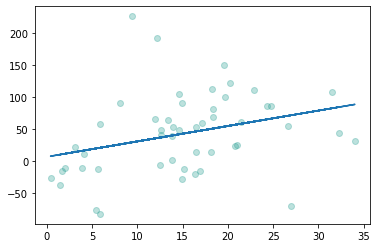

In [29]:
f,ax=plt.subplots()

ax.scatter(run_length, AUC_end, alpha=0.3, color= "#219C90")
ax.plot(run_length, y_pred)